<a href="https://colab.research.google.com/github/DoctorVinay8097/DLprojects/blob/main/Encoder_and_Decoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Encoder and Decoder**


Imagine you're sending a secret message to your friend, and you want to make sure nobody else can understand it. You can use two special machines to do this: **an encoder and a decoder.**

**Encoder:**

The encoder is like a machine that takes your message (which could be a picture, a sentence, or anything) and turns it into a secret code. It's like putting your message into a box with a lock, and the encoder creates the key.

In deep learning, an encoder is a part of a neural network that takes some data, like an image or text, and converts it into a different format. This new format is designed to capture important information about the input data in a more compact and abstract way. The idea is to make it harder for anyone to understand the original data but still keep its essential features.

**Decoder:**

The decoder is the machine your friend has. It takes the secret code you sent and uses the key to unlock it, revealing the original message. It's like opening the box with the key you created with the encoder.

In deep learning, a decoder is another part of a neural network that takes the encoded data and turns it back into something that's more understandable, like an image or text. It's designed to reconstruct the original data from the code created by the encoder.

The encoder and decoder are often used together in a type of deep learning model called an **"autoencoder."** Autoencoders are used for various tasks, like image compression, denoising, and even generating new data that's similar to the input data.

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/50
235/235 [==============================] - 6s 19ms/step - loss: 0.4090 - val_loss: 0.3393
Epoch 2/50
235/235 [==============================] - 4s 15ms/step - loss: 0.3216 - val_loss: 0.3159
Epoch 3/50
235/235 [==============================] - 4s 15ms/step - loss: 0.3108 - val_loss: 0.3105
Epoch 4/50
235/235 [==============================] - 5s 20ms/step - loss: 0.3068 - val_loss: 0.3078
Epoch 5/50
235/235 [==============================] - 4s 15ms/step - loss: 0.3042 - val_loss: 0.3053
Epoch 6/50
235/235 [==============================] - 3s 14ms/step - loss: 0.3021 - val_loss: 0.3035
Epoch 7/50
235/235 [==============================] - 5s 20ms/step - loss: 0.3005 - val_loss: 0.3018
Epoch 8/50
235/235 [==============================] - 3s 14ms/step - loss: 0.2993 - val_loss: 0.3007
Epoch 9/50
235/235 [==============================] - 4s 15ms/step - loss: 0.2983 - val_loss: 0.2998
Epoch 10/50
235/235 [=======

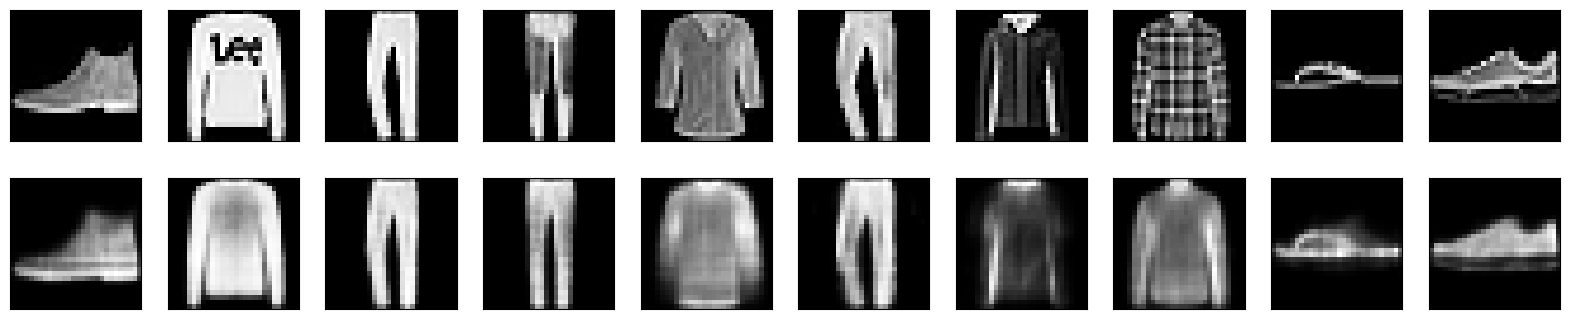

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset as an example
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize and prepare the data (values between 0 and 1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Build an autoencoder model
input_img = keras.Input(shape=(28, 28, 1))

# Encoder
x = layers.Flatten()(input_img)
x = layers.Dense(32, activation="relu")(x)
encoded = layers.Dense(16, activation="relu")(x)

# Decoder
x = layers.Dense(32, activation="relu")(encoded)
x = layers.Dense(784, activation="sigmoid")(x)
decoded = layers.Reshape((28, 28, 1))(x)

autoencoder = keras.Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Encode and decode the test images
encoded_images = autoencoder.predict(x_test)

# Display some original and autoencoded images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original Images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Autoencoded Images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


**Auto Encoder model**

We define the architecture of the autoencoder model. It consists of an encoder and a decoder.


**Dimensionality Reduction:**

The encoder part of the autoencoder takes the original 28x28 pixel images and compresses them into a lower-dimensional representation. In this case, it reduces the dimension from 784 (28x28) to 16.


This dimensionality reduction can be useful for various purposes, such as feature extraction. It captures essential features of the input images in a more compact form. For example, in the Fashion MNIST dataset, it might capture the basic shapes and patterns of the fashion items.


**Image Reconstruction:**

The decoder part of the autoencoder takes the compressed representation (16 dimensions) and reconstructs the original 28x28 pixel images.
By training the autoencoder on the same data as both input and target, the model learns to recreate the original images as accurately as possible.


This reconstruction process can be valuable for tasks like image denoising or image inpainting. If an image is partially damaged or contains noise, the autoencoder can be used to restore it to a cleaner version.

**Loss function**

The loss function used in the autoencoder code is binary cross-entropy, also known as binary log loss or binary logistic loss. This loss function is commonly used in autoencoders when treating the problem as a pixel-wise binary classification problem.

In the context of the autoencoder, each pixel in the image is treated as a separate binary classification problem. The task is to predict whether each pixel should be white (1) or black (0).

**Applications of autoencoders**

**Data Denoising:**

Autoencoders can be trained to remove noise from data. When presented with noisy data, they can reconstruct a cleaner version, making them useful for image denoising, signal denoising, and more.

**Image Super-Resolution:**

Autoencoders can be trained to upscale low-resolution images to higher resolutions. This is useful for improving the quality of images in applications like image processing and medical imaging.

**Image Generation:**

Variational autoencoders (a type of autoencoder) are used for generating new data samples that are similar to the training data. This is employed in applications like generative art and generating new images from a given dataset.

**Speech Recognition and Generation:**

Autoencoders are employed in tasks like speech recognition and synthesis, where they model audio signals and their characteristics.

# **Attention mechanism**
* An **attention mechanism** in deep learning is a fundamental component that allows a neural network to focus on specific parts of the input sequence or feature space when making predictions or encoding information.

* It has been particularly influential in tasks like natural language processing, image captioning, and machine translation.

* The attention mechanism allows the model to weigh the importance of different elements in the input data dynamically, giving more attention to relevant parts and less attention to irrelevant parts.


**Example:**

Let's say you're translating the English sentence "I see a big cat" into French. When generating the French word for "big," the attention mechanism might assign higher weights to the word "big" and lower weights to the other words in the English sentence. This allows the model to focus on the relevant information and produce an accurate translation.

## **Attention over images**

* Attention mechanisms are not exclusive to natural language processing tasks; they can also be applied to image-related tasks.

* In the context of computer vision, attention mechanisms can help models focus on specific regions or features of an image, enhancing their performance in tasks like image classification, object detection, and image captioning.

* This approach is often referred to as "visual attention."

**Visual Attention in Image Classification:**

Consider an image classification task where you have an image containing multiple objects, and you want to identify the main object in the image. Visual attention can help a model to selectively focus on different regions of the image, just like how a human would look at different parts of an image before making a decision.

**Input Image:** You start with an input image, which is represented as a matrix of pixel values. The size of the image could be, for example, 224x224 pixels.

**Convolutional Neural Network (CNN):** To process the image and extract meaningful features, you typically use a CNN, which consists of convolutional layers. These layers learn to recognize various patterns and features in the image.

**Attention Mechanism:** In this context, the attention mechanism helps the model determine where to focus its "attention." This can be thought of as a weight distribution over different regions of the image.

**Soft Attention Weights:** The attention mechanism calculates soft attention weights for different image regions. These weights indicate the importance of each region for the task at hand. Regions with higher attention weights are given more importance, and the model focuses on them.

**Weighted Sum:** The model computes a weighted sum of the CNN feature maps, with the attention weights serving as the weights. This weighted sum represents the most relevant information in the image.

**Classifier:** Finally, the model uses this weighted feature representation to make a prediction about the image's content, which could be the class label or a description.

## **Hierarchical Attention**

**Hierarchical attention** is an extension of the traditional attention mechanism used in deep learning, which enhances the model's ability to attend to multiple levels of information in a hierarchical manner.

It is especially useful when dealing with sequences of data, where different levels of granularity need to be considered.

Hierarchical attention can be applied to tasks like document classification, text summarization, and video analysis, where information exists at different levels of detail within a document or sequence.

* **Token-Level Attention:** At the lowest level, you have token-level attention. This is similar to the traditional attention mechanism, where the model focuses on specific tokens or words within a sequence. Token-level attention helps capture fine-grained details and relationships within short sequences.

* **Sentence-Level Attention:** At a higher level, you can introduce sentence-level attention. This attention mechanism considers entire sentences or segments of text. It allows the model to weigh the importance of different sentences within a document or sequence. Sentence-level attention captures the context and themes within a document.

* **Document-Level Attention:** At the top level, document-level attention considers the entire document or sequence as a whole. It helps the model understand the global context and overall structure of the document. This can be particularly useful when dealing with long documents or sequences.